In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos locales de CSV
equipment_losses = pd.read_csv('../russia_losses_equipment.csv')
personnel_losses = pd.read_csv('../russia_losses_personnel.csv')

print("Datos de equipamiento militar:")
print(equipment_losses.head())
print("\nDatos de pérdidas de personal:")
print(personnel_losses.head())

Datos de equipamiento militar:
         date   day  aircraft  helicopter   tank    APC  field artillery  \
0  2025-08-24  1278       422         340  11129  23167            31898   
1  2025-08-23  1277       422         340  11129  23164            31858   
2  2025-08-22  1276       422         340  11124  23160            31835   
3  2025-08-21  1275       422         340  11120  23157            31789   
4  2025-08-20  1274       422         340  11119  23152            31748   

    MRL  military auto  fuel tank  drone  naval ship  anti-aircraft warfare  \
0  1472            NaN        NaN  53056          28                   1211   
1  1472            NaN        NaN  52935          28                   1210   
2  1472            NaN        NaN  52787          28                   1210   
3  1471            NaN        NaN  52469          28                   1209   
4  1470            NaN        NaN  52154          28                   1208   

   special equipment  mobile SRBM sys

Información de los datasets:
Equipment losses - Shape: (1277, 19)
Personnel losses - Shape: (1277, 5)

Columnas disponibles:
Equipment: ['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone', 'naval ship', 'anti-aircraft warfare', 'special equipment', 'mobile SRBM system', 'greatest losses direction', 'vehicles and fuel tanks', 'cruise missiles', 'submarines']
Personnel: ['date', 'day', 'personnel', 'personnel*', 'POW']


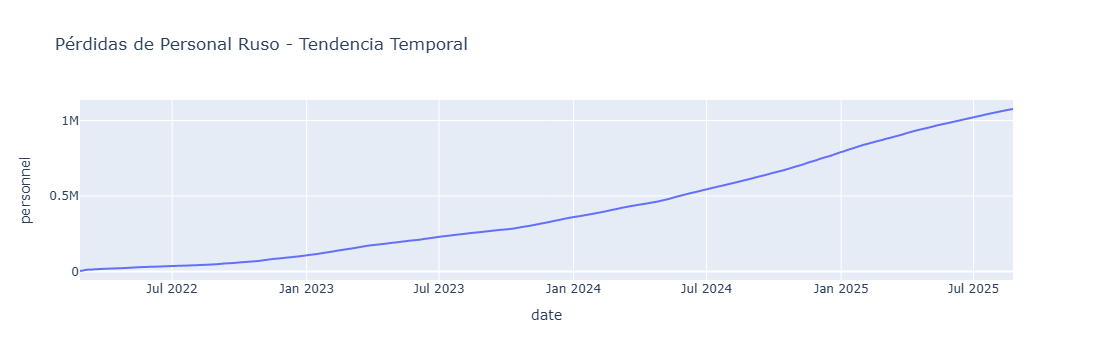

In [3]:
# Análisis exploratorio básico
print("Información de los datasets:")
print(f"Equipment losses - Shape: {equipment_losses.shape}")
print(f"Personnel losses - Shape: {personnel_losses.shape}")

print("\nColumnas disponibles:")
print("Equipment:", list(equipment_losses.columns))
print("Personnel:", list(personnel_losses.columns))

# Crear una visualización simple
fig = px.line(personnel_losses, 
              x='date', 
              y='personnel', 
              title='Pérdidas de Personal Ruso - Tendencia Temporal')
fig.show()

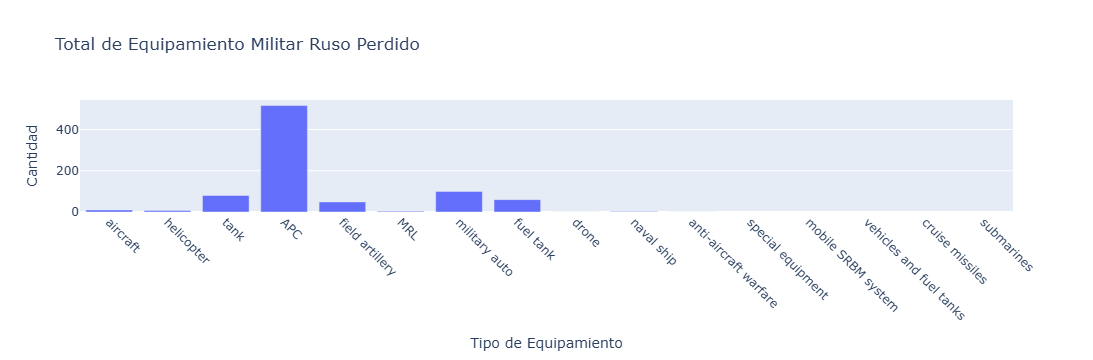

In [4]:
# Análisis del equipamiento militar perdido
# Convertir fecha a datetime si es necesario
equipment_losses['date'] = pd.to_datetime(equipment_losses['date'])

# Crear gráfico de barras con las pérdidas totales por categoría
equipment_cols = equipment_losses.select_dtypes(include=['int64', 'float64']).columns
equipment_cols = [col for col in equipment_cols if col != 'day']  # Excluir columna 'day' si existe

if len(equipment_cols) > 0:
    # Sumar totales por tipo de equipamiento
    totals = equipment_losses[equipment_cols].iloc[-1]  # Última fila = totales actuales
    
    fig = px.bar(x=totals.index, y=totals.values,
                 title='Total de Equipamiento Militar Ruso Perdido',
                 labels={'x': 'Tipo de Equipamiento', 'y': 'Cantidad'})
    fig.update_xaxes(tickangle=45)
    fig.show()

📊 RESUMEN DEL PIPELINE
Total días analizados: 1277
Pérdidas totales de personal: 2,800
Promedio diario: 2.2


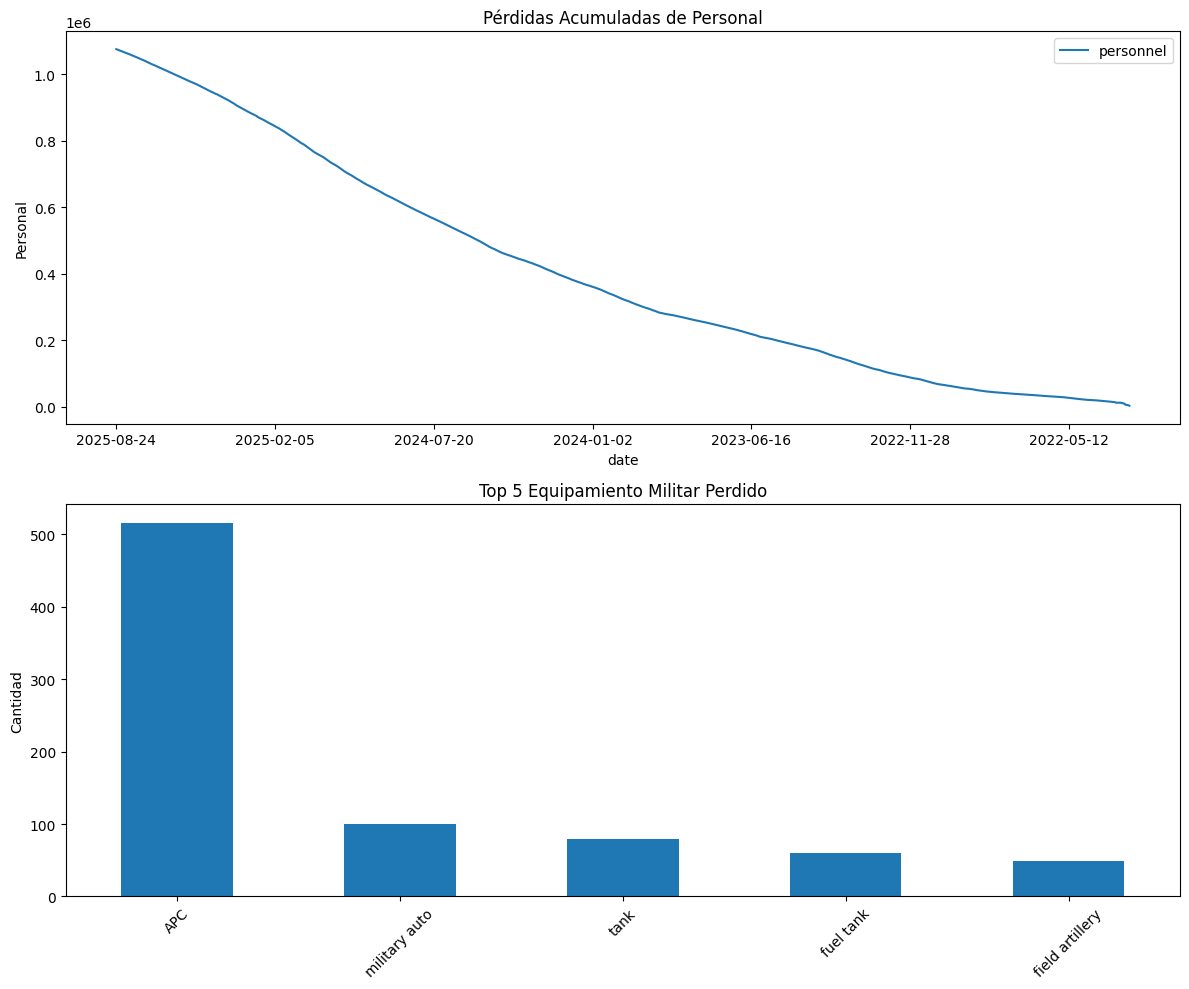

In [5]:
# Celda 5: Análisis comparativo
# Dashboard-style summary
total_personnel = personnel_losses['personnel'].iloc[-1]
days_of_conflict = len(personnel_losses)

print(f"📊 RESUMEN DEL PIPELINE")
print(f"Total días analizados: {days_of_conflict}")
print(f"Pérdidas totales de personal: {total_personnel:,}")
print(f"Promedio diario: {total_personnel/days_of_conflict:.1f}")

# Crear gráfico combinado
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico 1: Tendencia temporal
personnel_losses.plot(x='date', y='personnel', ax=ax1, title='Pérdidas Acumuladas de Personal')
ax1.set_ylabel('Personal')

# Gráfico 2: Top 5 equipamiento perdido
if len(equipment_cols) >= 5:
    top_5 = totals.nlargest(5)
    top_5.plot(kind='bar', ax=ax2, title='Top 5 Equipamiento Militar Perdido')
    ax2.set_ylabel('Cantidad')
    ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
